In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

plt.style.use('ggplot')






[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
df = pd.read_csv("D:/Sentiment Analysis/Reviews.csv")
df = df.head(50)
print(df.shape)

(50, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


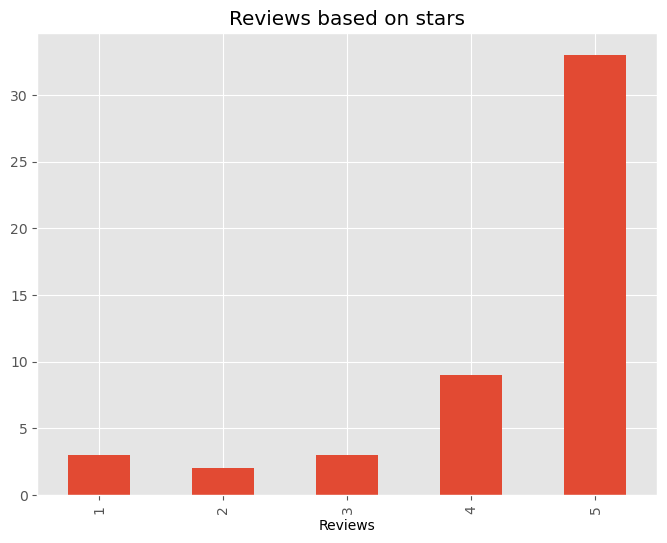

In [4]:
ax = df["Score"].value_counts().sort_index().plot(kind="bar", title = "Reviews based on stars", figsize = (8,6))
ax.set_xlabel("Reviews")
plt.show()

In [5]:
example = df["Text"][10]
print(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [8]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


# Hugging Face

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm

In [10]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [11]:
encoded_text = tokenizer(example, return_tensors="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.019134048, 'roberta_neu': 0.0710443, 'roberta_pos': 0.9098216}


In [12]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
     }
    return scores_dict

#### iterating over the code

In [13]:
res = {}

# Iterate over the first 500 rows of the DataFrame
for i, row in tqdm(df.head(500).iterrows(), total=min(50, len(df))):
    text = row["Text"]
    myid = row["Id"]
    roberta_result = polarity_scores_roberta(text)
    roberta = {**roberta_result}
    res[myid] = roberta

# Print the results for the first 500 rows
for myid, result in res.items():
    print(f"Id: {myid}")
    for key, value in result.items():
        print(f"{key}: {value}")
    print("\n")


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:06<00:00,  7.32s/it]

Id: 1
roberta_neg: 0.009624212048947811
roberta_neu: 0.049980372190475464
roberta_pos: 0.9403953552246094


Id: 2
roberta_neg: 0.508985698223114
roberta_neu: 0.4524139165878296
roberta_pos: 0.03860039636492729


Id: 3
roberta_neg: 0.00322891166433692
roberta_neu: 0.09806758910417557
roberta_pos: 0.8987035155296326


Id: 4
roberta_neg: 0.002295127371326089
roberta_neu: 0.09021928906440735
roberta_pos: 0.9074856042861938


Id: 5
roberta_neg: 0.0016347290948033333
roberta_neu: 0.010302456095814705
roberta_pos: 0.988062858581543


Id: 6
roberta_neg: 0.006129601504653692
roberta_neu: 0.021795857697725296
roberta_pos: 0.972074568271637


Id: 7
roberta_neg: 0.0013047514948993921
roberta_neu: 0.007773786783218384
roberta_pos: 0.9909214377403259


Id: 8
roberta_neg: 0.002029355149716139
roberta_neu: 0.00568520138040185
roberta_pos: 0.9922853708267212


Id: 9
roberta_neg: 0.003873576410114765
roberta_neu: 0.09415632486343384
roberta_pos: 0.9019700884819031


Id: 10
roberta_neg: 0.003103461582213

In [14]:
roberta 

{'roberta_neg': 0.9021341,
 'roberta_neu': 0.08792567,
 'roberta_pos': 0.009940127}

In [15]:
roberta_df = pd.DataFrame.from_dict(res, orient = "index")
roberta_df.reset_index(inplace = True)
roberta_df.rename(columns={"index":"Id"}, inplace=True)
roberta_df = roberta_df.merge(df, on ="Id", how = "left")
print(roberta_df)

    Id  roberta_neg  roberta_neu  roberta_pos   ProductId          UserId  \
0    1     0.009624     0.049980     0.940395  B001E4KFG0  A3SGXH7AUHU8GW   
1    2     0.508986     0.452414     0.038600  B00813GRG4  A1D87F6ZCVE5NK   
2    3     0.003229     0.098068     0.898704  B000LQOCH0   ABXLMWJIXXAIN   
3    4     0.002295     0.090219     0.907486  B000UA0QIQ  A395BORC6FGVXV   
4    5     0.001635     0.010302     0.988063  B006K2ZZ7K  A1UQRSCLF8GW1T   
5    6     0.006130     0.021796     0.972075  B006K2ZZ7K   ADT0SRK1MGOEU   
6    7     0.001305     0.007774     0.990921  B006K2ZZ7K  A1SP2KVKFXXRU1   
7    8     0.002029     0.005685     0.992285  B006K2ZZ7K  A3JRGQVEQN31IQ   
8    9     0.003874     0.094156     0.901970  B000E7L2R4  A1MZYO9TZK0BBI   
9   10     0.003103     0.055912     0.940984  B00171APVA  A21BT40VZCCYT4   
10  11     0.019134     0.071044     0.909822  B0001PB9FE  A3HDKO7OW0QNK4   
11  12     0.372643     0.519699     0.107658  B0009XLVG0  A2725IB4YY9JEB   

In [16]:
roberta_df.head()

,Id,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098068,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
roberta_df.columns

Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

#### Positive 1 star review

In [23]:
roberta_df.query("Score == 1").sort_values("roberta_pos", ascending=False)["Text"].values[1]


'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

#### Negative 5 star review

In [24]:
roberta_df.query("Score == 5").sort_values("roberta_neg", ascending=False)["Text"].values[1]


"One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week."

In [20]:
from transformers import pipeline
sent_pipeline = pipeline ("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [22]:
sent_pipeline("i am dissapointed")

[{'label': 'NEGATIVE', 'score': 0.9969462752342224}]

In [25]:
sent_pipeline("cats are better than dogs")

[{'label': 'POSITIVE', 'score': 0.9986716508865356}]